<a href="https://colab.research.google.com/github/kikosikera/2019_09_28_pd_np_mpl/blob/master/2019_09_28_pd_np_mpl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Developed Countries Healthcare System: KPI Analysis

#### This KPI Analysis will compare the most developed countries on indicators related to their Healthcare system.



- The study wants to point out which country performs better than others, whether there are trends in the time frame analyzed and find out hidden correlation between the indicators. 
- This analysis is important to understand which healthcare systems are more efficient than others and gives the elements to identify ways of improving them.
- This study considers the countries: France, Germany, Italy, UK, Japan, USA, Canada, Switzerland, Denmark, Netherlands, Belgium, Finland, Sweden, Norway, China, in a time interval from 2000 to 2010. 

In [0]:
# Source: https://www.kaggle.com/worldbank/world-development-indicators
# Folder: 'world-development-indicators'

### Import Libraries and Datasets

In [0]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# indicators - Countries and Topics
df_indicators = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data/PROJ/2019_09_28_pd_np_mpl/Data/Indicators.csv", sep = ',', low_memory=False)

In [5]:
df_indicators.shape, list(df_indicators), df_indicators.notnull().sum()

((5656458, 6),
 ['CountryName',
  'CountryCode',
  'IndicatorName',
  'IndicatorCode',
  'Year',
  'Value'],
 CountryName      5656458
 CountryCode      5656458
 IndicatorName    5656458
 IndicatorCode    5656458
 Year             5656458
 Value            5656458
 dtype: int64)

In [6]:
df_indicators.head(5)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [7]:
# On indicators: list total of unique countries and indicators names
countries = df_indicators["CountryCode"].unique().tolist()
indicators = df_indicators["IndicatorName"].unique().tolist()
print('countries size: %d' % len(countries))
print('indicators size: %d' % len(indicators))

countries size: 247
indicators size: 1344


In [8]:
df_indicators["IndicatorName"].unique().tolist()

['Adolescent fertility rate (births per 1,000 women ages 15-19)',
 'Age dependency ratio (% of working-age population)',
 'Age dependency ratio, old (% of working-age population)',
 'Age dependency ratio, young (% of working-age population)',
 'Arms exports (SIPRI trend indicator values)',
 'Arms imports (SIPRI trend indicator values)',
 'Birth rate, crude (per 1,000 people)',
 'CO2 emissions (kt)',
 'CO2 emissions (metric tons per capita)',
 'CO2 emissions from gaseous fuel consumption (% of total)',
 'CO2 emissions from liquid fuel consumption (% of total)',
 'CO2 emissions from liquid fuel consumption (kt)',
 'CO2 emissions from solid fuel consumption (% of total)',
 'Death rate, crude (per 1,000 people)',
 'Fertility rate, total (births per woman)',
 'Fixed telephone subscriptions',
 'Fixed telephone subscriptions (per 100 people)',
 'Hospital beds (per 1,000 people)',
 'International migrant stock (% of population)',
 'International migrant stock, total',
 'Life expectancy at birt

## Exploratory Data Analysis

#### The analysis wants to identify the following performance indicators: 

- Countries that have the highest **Health** **expenditure** per capita,
- Countries that have more **Hospital** beds per 1000 people,
- Countries that have more **Physicians** per 1000 people,
- A correlation between 'Health expenditure per capita' and 'Hospital beds per 1000 people'.

Also is very important to consider possible trends along the analyzed years.


In [0]:
# From indicators; keywords will be selected according to the study purposes
df_indicators_3 = df_indicators[df_indicators['IndicatorName'].str.contains('Health|Hospital|Physician|Population ages')]

In [10]:
df_indicators_3['IndicatorName'].unique().tolist()

['Hospital beds (per 1,000 people)',
 'Population ages 65 and above (% of total)',
 'Physicians (per 1,000 people)',
 'Health expenditure per capita (current US$)',
 'Health expenditure per capita, PPP (constant 2011 international $)',
 'Health expenditure, private (% of GDP)',
 'Health expenditure, public (% of GDP)',
 'Health expenditure, public (% of total health expenditure)',
 'Health expenditure, total (% of GDP)',
 'Health expenditure, public (% of government expenditure)']

In [11]:
df_indicators_3.shape

(48268, 6)

### Indicators selection

Drill down t the indicatorsFilter to the following indicators:

- Health expenditure per capita (current US$)
- Hospital beds (per 1,000 people)
- Physicians (per 1,000 people)


In [12]:
list(df_indicators_3)

['CountryName',
 'CountryCode',
 'IndicatorName',
 'IndicatorCode',
 'Year',
 'Value']

In [0]:
df_indicators_in = df_indicators_3.set_index('IndicatorName')

In [0]:
df_indicators_in = df_indicators_in.drop(['Population ages 65 and above (% of total)',
 'Health expenditure per capita, PPP (constant 2011 international $)',
 'Health expenditure, private (% of GDP)',
 'Health expenditure, public (% of GDP)',
 'Health expenditure, public (% of total health expenditure)',
 'Health expenditure, total (% of GDP)',
 'Health expenditure, public (% of government expenditure)'], axis=0)

In [15]:
df_indicators_in.head()

,CountryName,CountryCode,IndicatorCode,Year,Value
IndicatorName,,,,,
"Hospital beds (per 1,000 people)",Arab World,ARB,SH.MED.BEDS.ZS,1960,1.929622
"Hospital beds (per 1,000 people)",Caribbean small states,CSS,SH.MED.BEDS.ZS,1960,5.054266
"Hospital beds (per 1,000 people)",Fragile and conflict affected situations,FCS,SH.MED.BEDS.ZS,1960,1.790193
"Hospital beds (per 1,000 people)",Heavily indebted poor countries (HIPC),HPC,SH.MED.BEDS.ZS,1960,1.515629
"Hospital beds (per 1,000 people)",High income: OECD,OEC,SH.MED.BEDS.ZS,1960,9.105600


In [0]:
df_indicators_in = df_indicators_in.reset_index('IndicatorName')

In [17]:
df_indicators_in.head()

,IndicatorName,CountryName,CountryCode,IndicatorCode,Year,Value
0,"Hospital beds (per 1,000 people)",Arab World,ARB,SH.MED.BEDS.ZS,1960,1.929622
1,"Hospital beds (per 1,000 people)",Caribbean small states,CSS,SH.MED.BEDS.ZS,1960,5.054266
2,"Hospital beds (per 1,000 people)",Fragile and conflict affected situations,FCS,SH.MED.BEDS.ZS,1960,1.790193
3,"Hospital beds (per 1,000 people)",Heavily indebted poor countries (HIPC),HPC,SH.MED.BEDS.ZS,1960,1.515629
4,"Hospital beds (per 1,000 people)",High income: OECD,OEC,SH.MED.BEDS.ZS,1960,9.105600


In [18]:
df_indicators_in.shape

(11266, 6)

### Countries selection
- G7 members + Switzerland, Denmark, Netherlands, Belgium, Finland, Sweden, Norway
- North America
- China and Japan

In [0]:
df_indicators_cc = df_indicators_in.set_index('CountryCode')

In [20]:
df_indicators_cc.head()

,IndicatorName,CountryName,IndicatorCode,Year,Value
CountryCode,,,,,
ARB,"Hospital beds (per 1,000 people)",Arab World,SH.MED.BEDS.ZS,1960,1.929622
CSS,"Hospital beds (per 1,000 people)",Caribbean small states,SH.MED.BEDS.ZS,1960,5.054266
FCS,"Hospital beds (per 1,000 people)",Fragile and conflict affected situations,SH.MED.BEDS.ZS,1960,1.790193
HPC,"Hospital beds (per 1,000 people)",Heavily indebted poor countries (HIPC),SH.MED.BEDS.ZS,1960,1.515629
OEC,"Hospital beds (per 1,000 people)",High income: OECD,SH.MED.BEDS.ZS,1960,9.105600


In [0]:
df_indicators_cc = df_indicators_cc.loc[ ['CAN', 'FRA', 'DEU', 'IT', 'JPN', 'GBR', 'USA', 
                  'CHE', 'DNK', 'NLD', 'BEL', 'SWE', 'NOR', 'FIN'] , : ]

In [143]:
df_indicators_cc.shape

(1078, 6)

In [0]:
df_indicators_cc = df_indicators_cc.reset_index('CountryCode')

In [24]:
df_indicators_cc.head()

,CountryCode,IndicatorName,CountryName,IndicatorCode,Year,Value
0,CAN,"Hospital beds (per 1,000 people)",Canada,SH.MED.BEDS.ZS,1960.0,6.2
1,CAN,"Physicians (per 1,000 people)",Canada,SH.MED.PHYS.ZS,1961.0,1.1
2,CAN,"Physicians (per 1,000 people)",Canada,SH.MED.PHYS.ZS,1962.0,1.2
3,CAN,"Physicians (per 1,000 people)",Canada,SH.MED.PHYS.ZS,1963.0,1.3
4,CAN,"Physicians (per 1,000 people)",Canada,SH.MED.PHYS.ZS,1964.0,1.3


### Years of interest
Time interval from 2000 to 2010 included

In [0]:
df_indicators_ye = df_indicators_cc.set_index('Year')

In [26]:
df_indicators_ye.head()

,CountryCode,IndicatorName,CountryName,IndicatorCode,Value
Year,,,,,
1960.0,CAN,"Hospital beds (per 1,000 people)",Canada,SH.MED.BEDS.ZS,6.2
1961.0,CAN,"Physicians (per 1,000 people)",Canada,SH.MED.PHYS.ZS,1.1
1962.0,CAN,"Physicians (per 1,000 people)",Canada,SH.MED.PHYS.ZS,1.2
1963.0,CAN,"Physicians (per 1,000 people)",Canada,SH.MED.PHYS.ZS,1.3
1964.0,CAN,"Physicians (per 1,000 people)",Canada,SH.MED.PHYS.ZS,1.3


In [0]:
df_indicators_ye = df_indicators_ye.loc[ [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010] , : ]

In [0]:
df_indicators_ye = df_indicators_ye.reset_index('Year')

In [29]:
df_indicators_ye.head()

,Year,CountryCode,IndicatorName,CountryName,IndicatorCode,Value
0,2000.0,CAN,Health expenditure per capita (current US$),Canada,SH.XPD.PCAP,2099.841406
1,2000.0,CAN,"Hospital beds (per 1,000 people)",Canada,SH.MED.BEDS.ZS,3.400000
2,2000.0,CAN,"Physicians (per 1,000 people)",Canada,SH.MED.PHYS.ZS,2.100000
3,2000.0,FRA,Health expenditure per capita (current US$),France,SH.XPD.PCAP,2209.243825
4,2000.0,FRA,"Hospital beds (per 1,000 people)",France,SH.MED.BEDS.ZS,8.100000


In [30]:
df_indicators_ye.shape

(339, 6)

## Data Cleaning

In [0]:
df_indicators_ye.columns = df_indicators_ye.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [32]:
# Checking missing data
df_indicators_ye.shape, list(df_indicators_ye), df_indicators_ye.isnull().sum()

((339, 6),
 ['Year',
  'CountryCode',
  'IndicatorName',
  'CountryName',
  'IndicatorCode',
  'Value'],
 Year             0
 CountryCode      0
 IndicatorName    0
 CountryName      0
 IndicatorCode    0
 Value            0
 dtype: int64)

In [0]:
df_indicators_ye = df_indicators_ye[['Year', 'CountryCode', 'CountryName', 'IndicatorName','IndicatorCode', 'Value']]

In [34]:
df_indicators_ye.head()

,Year,CountryCode,CountryName,IndicatorName,IndicatorCode,Value
0,2000.0,CAN,Canada,Health expenditure per capita (current US$),SH.XPD.PCAP,2099.841406
1,2000.0,CAN,Canada,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,3.400000
2,2000.0,CAN,Canada,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,2.100000
3,2000.0,FRA,France,Health expenditure per capita (current US$),SH.XPD.PCAP,2209.243825
4,2000.0,FRA,France,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,8.100000


In [0]:
df_indicators_final = df_indicators_ye.copy()

## KPI Insights + Data Visualization


## Data Analysis on the Indicator 'Health expenditure per capita (current USD)'

In [0]:
df_indicators_he = df_indicators_final.set_index('IndicatorName')

In [0]:
df_indicators_he.drop(columns =['CountryCode','IndicatorCode'], inplace = True)

In [0]:
df_indicators_he['Year'] = df_indicators_he['Year'].astype(int)

In [39]:
df_indicators_he.head()

,Year,CountryName,Value
IndicatorName,,,
Health expenditure per capita (current US$),2000,Canada,2099.841406
"Hospital beds (per 1,000 people)",2000,Canada,3.400000
"Physicians (per 1,000 people)",2000,Canada,2.100000
Health expenditure per capita (current US$),2000,France,2209.243825
"Hospital beds (per 1,000 people)",2000,France,8.100000


In [0]:
df_indicators_he = df_indicators_he.loc[ ['Health expenditure per capita (current US$)'] , : ]

In [0]:
df_indicators_he = df_indicators_he.reset_index('IndicatorName')

In [0]:
df_indicators_he_plt = pd.pivot_table(df_indicators_he, values ='Value', index =['Year'], 
                         columns = ['CountryName'])

In [0]:
df_indicators_he_plt = df_indicators_he_plt.astype(int)

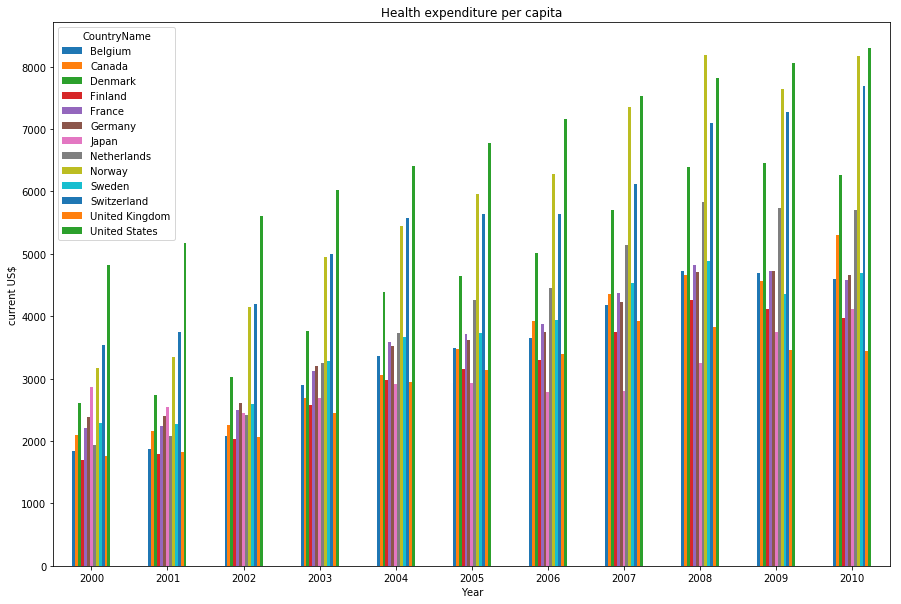

In [44]:
fig, (ax1) = plt.subplots(1, figsize=(15,10))
df_indicators_he_plt.plot.bar(ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.set_title('Health expenditure per capita')
ax1.set_ylabel('current US$')
plt.show()

In [0]:
df_indicators_he_plt_co = pd.pivot_table(df_indicators_he, values ='Value', index =['CountryName'], 
                         columns = ['Year'])

In [0]:
df_indicators_he_plt_co = df_indicators_he_plt_co.astype(int)

In [0]:
df_indicators_he_plt_co['Total'] = df_indicators_he_plt_co.sum(axis=1)
df_indicators_he_plt_co.sort_values('Total', axis = 0, ascending = False, 
                 inplace = True, na_position ='last')

In [48]:
df_indicators_he_plt_co.head(13)

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,Total
CountryName,,,,,,,,,,,,
United States,4817,5167,5607,6030,6401,6775,7155,7538,7825,8054,8298,73667
Norway,3164,3340,4153,4951,5452,5961,6276,7351,8193,7637,8164,64642
Switzerland,3541,3748,4190,5002,5570,5636,5642,6126,7104,7277,7697,61533
Denmark,2612,2730,3023,3756,4387,4652,5017,5709,6395,6464,6266,51011
Netherlands,1931,2079,2411,3248,3739,4261,4458,5149,5834,5739,5695,44544
Sweden,2282,2267,2599,3277,3666,3726,3947,4525,4886,4357,4694,40226
Germany,2386,2401,2610,3206,3524,3624,3745,4230,4717,4727,4668,39838
France,2209,2241,2496,3115,3592,3721,3871,4371,4827,4722,4583,39748
Canada,2099,2162,2262,2690,3062,3474,3931,4364,4662,4561,5305,38572


In [0]:
df_indicators_he_plt_co.to_csv(r"/content/drive/My Drive/Colab Notebooks/Data/PROJ/2019_09_28_pd_np_mpl/Data/df_indicators_he_plt_co.csv", sep = ',')

### United States, Norway and Switzerland had the highest Health Expenditure per capita. 
- As expected the Health Expenditure per capita has been continuously increasing during the time range.

In [103]:
%%HTML
<iframe src='https://public.flourish.studio/visualisation/747494/embed' frameborder='0' scrolling='no' style='width:85%;height:500px;'></iframe><div style='width:100%!;margin-top:4px!important;text-align:right!important;'><a class='flourish-credit' href='https://public.flourish.studio/visualisation/747494/?utm_source=embed&utm_campaign=visualisation/747494' target='_top' style='text-decoration:none!important'><img alt='Made with Flourish' src='https://public.flourish.studio/resources/made_with_flourish.svg' style='width:105px!important;height:16px!important;border:none!important;margin:0!important;'> </a></div>

## Data Analysis on the Indicator 'Hospital beds (per 1,000 people)'

In [0]:
df_indicators_hb = df_indicators_final.set_index('IndicatorName')

In [0]:
df_indicators_hb.drop(columns =['CountryCode','IndicatorCode'], inplace = True)

In [0]:
df_indicators_hb['Year'] = df_indicators_hb['Year'].astype(int)

In [54]:
df_indicators_hb.head()

,Year,CountryName,Value
IndicatorName,,,
Health expenditure per capita (current US$),2000,Canada,2099.841406
"Hospital beds (per 1,000 people)",2000,Canada,3.400000
"Physicians (per 1,000 people)",2000,Canada,2.100000
Health expenditure per capita (current US$),2000,France,2209.243825
"Hospital beds (per 1,000 people)",2000,France,8.100000


In [0]:
df_indicators_hb = df_indicators_hb.loc[ ['Hospital beds (per 1,000 people)'] , : ]

In [0]:
df_indicators_hb = df_indicators_hb.reset_index('IndicatorName')

In [0]:
df_indicators_hb_plt = pd.pivot_table(df_indicators_hb, values ='Value', index =['Year'], 
                         columns = ['CountryName'])

In [0]:
df_indicators_hb_plt.fillna(0, inplace = True) 

In [0]:
df_indicators_hb_plt = df_indicators_hb_plt.astype(int)

In [117]:
%%HTML
<div class='tableauPlaceholder' id='viz1570483264587' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;df&#47;df_indicators_hb_plt_to&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='df_indicators_hb_plt_to&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;df&#47;df_indicators_hb_plt_to&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1570483264587');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='800px';vizElement.style.height='627px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='800px';vizElement.style.height='627px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [0]:
df_indicators_hb_plt_to = pd.pivot_table(df_indicators_hb, values ='Value', index =['CountryName'], 
                         columns = ['Year'])

In [0]:
df_indicators_hb_plt_to['Max'] = df_indicators_hb_plt_to.max(axis=1)
df_indicators_hb_plt_to.sort_values('Max', axis = 0, ascending = False, 
                 inplace = True, na_position ='last')

In [0]:
df_indicators_hb_plt_to.fillna(0, inplace = True) 

In [0]:
df_indicators_hb_plt_to = df_indicators_hb_plt_to.astype(int)

In [66]:
df_indicators_hb_plt_to.head(13)

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,Max
CountryName,,,,,,,,,,,,
Japan,14,12,14,14,13,14,13,0,13,13,0,14
Germany,9,9,8,0,0,8,8,0,8,8,8,9
France,8,8,7,7,7,7,7,0,7,6,6,8
Finland,7,0,0,7,0,7,7,6,6,6,5,7
Belgium,7,6,6,0,0,5,5,5,0,6,6,7
Switzerland,0,0,6,0,5,5,0,0,5,5,4,6
Netherlands,4,4,0,5,0,0,0,4,4,4,0,5
Denmark,4,4,4,4,3,0,0,3,3,3,3,4
Norway,3,0,0,0,0,4,4,3,3,3,3,4


In [0]:
df_indicators_hb_plt_to.to_csv(r"/content/drive/My Drive/Colab Notebooks/Data/PROJ/2019_09_28_pd_np_mpl/Data/df_indicators_hb_plt_to.csv", sep = ',')

### There is a remarkable difference in the number of hospital beds provided by Japan compared to the other Countries.
- This indicator remains constant during the interval 2000-2010

 

## Data Analysis on the Indicator 'Physicians (per 1,000 people)'

In [0]:
df_indicators_ph = df_indicators_final.set_index('IndicatorName')

In [0]:
df_indicators_ph.drop(columns =['CountryCode','IndicatorCode'], inplace = True)

In [0]:
df_indicators_ph['Year'] = df_indicators_ph['Year'].astype(int)

In [70]:
df_indicators_ph.head()

,Year,CountryName,Value
IndicatorName,,,
Health expenditure per capita (current US$),2000,Canada,2099.841406
"Hospital beds (per 1,000 people)",2000,Canada,3.400000
"Physicians (per 1,000 people)",2000,Canada,2.100000
Health expenditure per capita (current US$),2000,France,2209.243825
"Hospital beds (per 1,000 people)",2000,France,8.100000


In [0]:
df_indicators_ph = df_indicators_ph.loc[ ['Physicians (per 1,000 people)'] , : ]

In [0]:
df_indicators_ph = df_indicators_ph.reset_index('IndicatorName')

In [0]:
df_indicators_ph_plt = pd.pivot_table(df_indicators_ph, values ='Value', index =['Year'], 
                         columns = ['CountryName'])

In [0]:
df_indicators_ph_plt.fillna(0, inplace = True) 

In [135]:
%%HTML
<div class='tableauPlaceholder' id='viz1570491956124' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;df&#47;df_indicators_ph&#47;Dashboard2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='df_indicators_ph&#47;Dashboard2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;df&#47;df_indicators_ph&#47;Dashboard2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1570491956124');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='800px';vizElement.style.height='677px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='800px';vizElement.style.height='677px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [0]:
df_indicators_ph_plt = df_indicators_ph_plt.astype(int)

In [0]:
df_indicators_ph_plt_to = pd.pivot_table(df_indicators_ph, values ='Value', index =['CountryName'], 
                         columns = ['Year'])

In [0]:
df_indicators_ph_plt_to['Max'] = df_indicators_ph_plt_to.max(axis=1)
df_indicators_ph_plt_to.sort_values('Max', axis = 0, ascending = False, 
                 inplace = True, na_position ='last')

In [0]:
df_indicators_ph_plt_to.fillna(0, inplace = True) 

In [0]:
df_indicators_ph_plt_to = df_indicators_ph_plt_to.astype(int)

In [81]:
df_indicators_ph_plt_to.head(13)

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,Max
CountryName,,,,,,,,,,,,
Belgium,3,3,3,0,0,0,4,0,2,0,3,4
Norway,2,3,3,3,0,0,3,3,4,4,4,4
Switzerland,3,3,3,0,0,0,3,0,0,0,4,4
Netherlands,3,3,3,3,0,3,0,3,2,0,2,3
Sweden,3,3,3,0,3,0,3,3,3,3,3,3
France,3,3,3,3,3,0,3,3,3,0,3,3
Germany,3,3,3,3,0,0,3,3,3,0,3,3
Denmark,2,2,2,0,3,0,3,3,0,3,3,3
Finland,2,2,2,2,0,0,3,3,2,2,2,3


### In this case the number of physicians provided by Belgium, Norway and Switzerland excels compared to the other countries included in the study.
-  Also, in this case the indicator remains constant in the interval 2000-2010


 

In [0]:
df_indicators_ph_plt_to.to_csv(r"/content/drive/My Drive/Colab Notebooks/Data/PROJ/2019_09_28_pd_np_mpl/Data/df_indicators_ph_plt_to.csv", sep = ',')

## Correlation between "Health expenditure per capita" and "Hospital beds (per 1,000 people)"

In [0]:
# Extract total from the health expenditure dataframe
df_indicators_he.corr = df_indicators_he_plt_co.copy()

In [84]:
df_indicators_he.corr.head(13)

Year,Total
CountryName,
Belgium,37383
Canada,38572
Denmark,51011
Finland,33627
France,39748
Germany,39838
Japan,33107
Netherlands,44544
Norway,64642


In [0]:
# Extract Max from the hospital beds dataframe
df_indicators_hb.corr = df_indicators_hb_plt_to.copy()

In [0]:
df_indicators_hb.corr = pd.pivot_table(df_indicators_hb.corr, values ='Max', index =['CountryName'])

In [87]:
df_indicators_hb.corr.head(13)

Year,Max
CountryName,
Belgium,7
Canada,3
Denmark,4
Finland,7
France,8
Germany,9
Japan,14
Netherlands,5
Norway,4


In [0]:
# Concatenate the two dataframes selected
df_health_bed = pd.concat([df_indicators_he.corr, df_indicators_hb.corr], axis =1)

In [89]:
df_health_bed.head(26)

Year,Total,Max
CountryName,,
Belgium,37383,7
Canada,38572,3
Denmark,51011,4
Finland,33627,7
France,39748,8
Germany,39838,9
Japan,33107,14
Netherlands,44544,5
Norway,64642,4


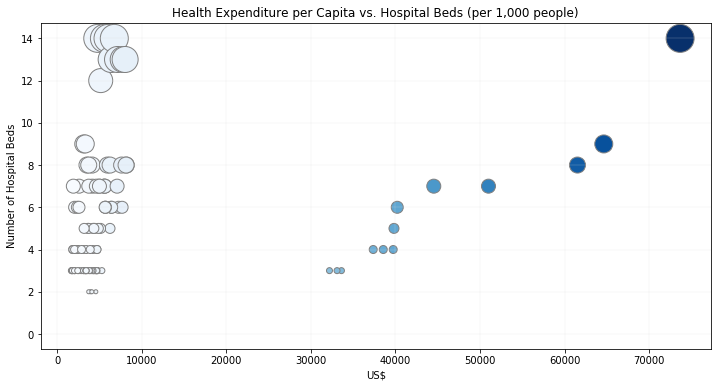

In [181]:
plt.figure(figsize=(12,6))
x = df_indicators_he_plt_co
y = df_indicators_hb_plt_to
z = df_indicators_hb_plt_to
z=z*z
plt.grid(linestyle='-', linewidth='0.2', color='Gainsboro')
plt.scatter(x, y, s=z*4, c=x, cmap="Blues", alpha=2, edgecolors="grey", linewidth=1)
plt.xlabel("US$")
plt.ylabel("Number of Hospital Beds")
plt.title('Health Expenditure per Capita vs. Hospital Beds (per 1,000 people)')
 
plt.show()


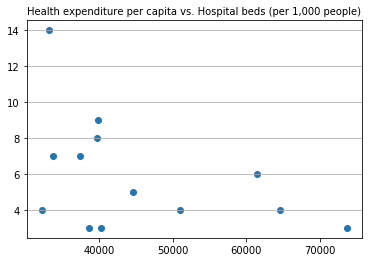

In [183]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()

axis.yaxis.grid(True)
axis.set_title('Health expenditure per capita vs. Hospital beds (per 1,000 people)',fontsize=10)

X = df_indicators_he.corr['Total']
Y = df_indicators_hb.corr['Max']

axis.scatter(X, Y)
plt.show()

### It seems that has no correlation between the two indicators. Let's calculate the correlation matrix:

In [120]:
np.corrcoef(df_indicators_he.corr['Total'],df_indicators_hb.corr['Max'])

array([[ 1.        , -0.43237008],
       [-0.43237008,  1.        ]])

### The correlation between 'Health expenditure per capita' and 'Hospital beds' is weak: 0.43
- Correlations between 0.45 and 0.75 are moderate, and those below 0.45 are considered weak.

In [0]:
########################################################################################################################################################################